In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
ps = PorterStemmer() 
def tokenization(line):
    tokenizer = RegexpTokenizer(r'\w+')
    new_line = tokenizer.tokenize(line)
    for count,token in enumerate(new_line):
        new_line[count] = lemmatizer.lemmatize(token.lower())        
    return ' '.join(new_line)

import data

In [3]:
path = 'quora_duplicate_questions.tsv'
import pandas as pd
quora = pd.read_csv(path, sep = '\t') #.dropna(axis=0)
quora.columns.values.tolist()

['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

In [5]:
len(list(quora.question2.tolist())),quora.qid2.tolist()[404289],quora.qid1.tolist()[404289]

(404290, 537933, 537932)

It can be found thet there are existing duplicated question for original question

In [4]:
dataaa = {}
for count,i in enumerate(quora.qid2.tolist()):
    dataaa[i] = []

In [16]:
len(list(dataaa.keys())),count

(299364, 404289)

select 10,000 for index

In [31]:
counter = 0
duplicate = []
corpus = {}
for count,i in enumerate(quora.is_duplicate.tolist()[0:100000]):
    corpus[quora.qid1.tolist()[count]] = quora.question1.tolist()[count]
    corpus[quora.qid2.tolist()[count]] = quora.question2.tolist()[count]

In [32]:
len(list(corpus.keys()))

165931

In [6]:
import pickle
pickle.dump(corpus,open('corpus.pickle','wb'))

NameError: name 'corpus' is not defined

Selec top 5000 question pair for experiments: data = {'qid':question}///

In [ ]:
len(quora.qid2.tolist())
data_all = {}
for count,q in enumerate(quora.qid1.tolist()):
    data_all[q] = quora.question1.tolist()[count]

In [ ]:
for count,q in enumerate(quora.qid2.tolist()):
    data_all[q] = quora.question2.tolist()[count]

Saving top 5000 pair/all pair

In [20]:
import pickle
data_5000 = data
len(list(data_5000.keys()))
pickle.dump(data_5000,open('quora_5000',"wb"))

Loading 5000 pairs

In [3]:
import pickle
all_pair = pickle.load(open('quora_5000',"rb"))
len(list(all_pair.keys()))

9859

finding 4000 duplictaed pairs ALL FROM HERE

In [7]:
counter = 0
duplicate = []
corpus_question = {}
for count,i in enumerate(quora.is_duplicate.tolist()[0:10760]):
    if i == 1:
        counter += 1
        corpus_question[quora.qid1.tolist()[count]] = quora.question1.tolist()[count]
        corpus_question[quora.qid2.tolist()[count]] = quora.question2.tolist()[count]
#         duplicate.append([quora.qid1.tolist()[count],quora.qid2.tolist()[count]])
        

KeyboardInterrupt: 

In [54]:
counter,count

(4000, 10759)

In [4]:
import pickle
# pickle.dump(corpus_question,open('corpus_question',"wb"))
corpus_question = pickle.load(open('corpus_question',"rb"))

In [3]:
import pickle
pickle.dump(duplicate,open('4000_duplicate_pair',"wb"))

NameError: name 'duplicate' is not defined

Collect question: selected_pair:{'qid1':qid2}

In [5]:
import pickle
duplicate = pickle.load(open('4000_duplicate_pair',"rb"))
# count = 0
# selected_pair = {}
# for i in duplicate:
#     selected_pair[i[0]] = i[1]
# print(len(list(selected_pair.keys())))
# selected_pair[15]
type(duplicate)

list

Delete repeated qid1

In [6]:
selected_1 = []
selected_2 = []
for i in duplicate:
    selected_1.append(i[0])
    selected_2.append(i[1])
len(selected_1)

4000

In [7]:
from collections import Counter
final_selected_pair = {}
repeated=[]
for count,i in enumerate(selected_1):
    if Counter(selected_1)[i]!=1:
#         print(i)
        repeated.append(i)
    else:
        final_selected_pair[i]=selected_2[count]
pickle.dump(final_selected_pair,open('final_selected_pair','wb'))
len(repeated),len(list(final_selected_pair.keys()))

(310, 3690)

In [8]:
len(list(final_selected_pair)),type(final_selected_pair)

(3690, dict)

final corpus question

In [9]:
import pickle
final_corpus_question = {}
for key,item in final_selected_pair.items():
    final_corpus_question[key]=corpus_question[key]
    final_corpus_question[item]=corpus_question[item]
len(list(final_corpus_question)),len(list(corpus_question))

(7152, 7526)

Preprocessing question: lowercase and stem

prepare for index: 

In [37]:
fw = open('corpus','w',encoding='utf-8') 
for key,item in corpus.items():
    fw.write('<DOC>' + '\n')
    fw.write('<DOCNO>' + str(key) + '</DOCNO>'+ '\n')
    fw.write('<TEXT>' + '\n')
    fw.write(tokenization(item))
    fw.write('</TEXT>' + '\n')
    fw.write('</DOC>' + '\n')
    

Generate Topic file. Using slected_pair[i][0]

In [224]:
fw = open('_'.join(('final','initial','topic')),'w',encoding='utf-8')
fw.write('<parameters>' + '\n')
fw.write('<index>' + '/ssd2/wanning/Indri/index/Quora_index' +'</index>'+ '\n')
fw.write('<count>11</count>' + '\n')
fw.write('<trecFormat>true</trecFormat>' + '\n')
for key,item in final_selected_pair.items():
    fw.write('<query>' + '\n')
    fw.write('<number>' + ' '+ str(key) + '</number>' + '\n')
    fw.write('<text>' + tokenization(final_corpus_question[key]) + '</text>' + '\n')
    fw.write('</query>'+ '\n')
fw.write('</parameters>')
fw.close()

split train/test/dev according to QID: 3038/400/400

In [8]:
import pickle
final_selected_pair = pickle.load(open('final_selected_pair','rb'))
train_id = list(final_selected_pair.keys())[0:3090]
dev_id = list(final_selected_pair.keys())[3090:3390]
test_id = list(final_selected_pair.keys())[3390:3690]
len(train_id)+len(dev_id)+len(test_id),len(train_id),len(dev_id),len(test_id)
pickle.dump(test_id,open('test_id','wb'))

Generate train/test/dev dataset by reading the initial runfile(to find corresponding negative sample)
Construct dataset

In [47]:
data = []
qid_rel = {}
with open('final_initial_run','r') as f:
    for count,line in enumerate(f):
        data.append(line)
        if count%11 == 0:
            qid_rel[line.strip().split(' ')[0]] = {}
            ### no qid itself ###
        qid_rel[line.strip().split(' ')[0]][str(final_selected_pair[int(line.strip().split(' ')[0])])] = 1
        if line.strip().split(' ')[0] != line.strip().split(' ')[2]:
                ### no positive qid ####
            if int(line.strip().split(' ')[2]) != final_selected_pair[int(line.strip().split(' ')[0])]:
                qid_rel[line.strip().split(' ')[0]][line.strip().split(' ')[2]] = 0
           

In [10]:
# len(list(qid_rel.keys())),qid_rel
import pickle
pickle.dump(qid_rel,open('qid_rel','wb'))

NameError: name 'qid_rel' is not defined

build train/dev/test topic file

In [11]:
# qid = dev_id + train_id
# name = 'train_dev'
qid = train_id + dev_id
name = 'train_dev'
fw = open('_'.join((name,'topic')),'w',encoding='utf-8')
fw.write('<parameters>' + '\n')
fw.write('<index>' + '/ssd2/wanning/Indri/index/Quora_index' +'</index>'+ '\n')
fw.write('<trecFormat>true</trecFormat>' + '\n')
for i in qid:
    fw.write('<query>' + '\n')
    fw.write('<number>' + str(i) + '</number>' + '\n')
    fw.write('<text>' + tokenization(final_corpus_question[i]) + '</text>' + '\n')
    for j in qid_rel[str(i)].keys():
        fw.write('<workingSetDocno>' + j + '</workingSetDocno>'+'\n')
    fw.write('</query>'+ '\n')
fw.write('</parameters>')
fw.close()

NameError: name 'final_corpus_question' is not defined

Build Qrels file

In [252]:
fw = open('_'.join(('quora','qrels')),'w',encoding='utf-8')
for qid in [train_id,test_id,dev_id]:
    for i in qid:
        for j in qid_rel[str(i)].keys():
            fw.write(str(i) + ' ' + '0' + ' ' + j + ' ' + str(qid_rel[str(i)][j]) + '\n')
fw.close()

Dataset Analysis: query length

In [12]:
from nltk.tokenize import RegexpTokenizer
def text_length(x):
    tokenizer = RegexpTokenizer(r'\w+')
    if x is None:
        return 0
    return len(tokenizer.tokenize(x))

Length of test set

In [15]:
import numpy as np
length = []
for item in test_id:
    length.append(text_length(final_corpus_question[item]))
print('average length is:{0}, st is:{1}'.format(np.mean(length),np.std(length)))
print('max length is:{0}, min length is:{1}'.format(max(length),min(length)))

average length is:10.146666666666667, st is:4.344171062725572
max length is:33, min length is:3


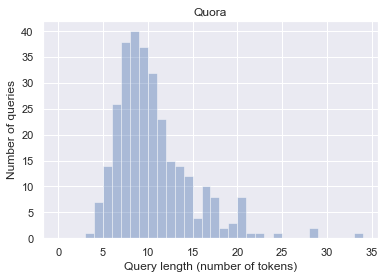

In [17]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(length,bins=[x for x in range(35)],axlabel='Query length (number of tokens)',kde=False)
plt.title('Quora')
# plt.xlabel('Delay (min)')
plt.ylabel('Number of queries')
plt.savefig("query_length_quora.png")

set number of length bin for query question. FOR TESTSET

In [22]:
import pickle
length_bin = {}
counter = 0
for i in range(5):
    length_bin[i+1] = []
for i in test_id:
#     print(text_length(final_corpus_question[i]))
    if text_length(final_corpus_question[i]) <= 5:
        length_bin[1].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 5 and text_length(final_corpus_question[i]) <= 10:
        length_bin[2].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 10 and text_length(final_corpus_question[i]) <= 15:
        length_bin[3].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 15 and text_length(final_corpus_question[i]) <= 20:
        length_bin[4].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 20:
        length_bin[5].append(i)
        counter += 1

pickle.dump(length_bin,open('length_bin',"wb"))

In [27]:
len(length_bin[1]) + len(length_bin[2]) +len(length_bin[3]) + len(length_bin[4]),len(length_bin[5])

(294, 6)

In [30]:
294/300

0.98

In [309]:
import pickle
pickle.dump(final_corpus_question,open('final_corpus_question','wb'))

In [29]:
import pickle
length_bin_new = {}
counter = 0
for i in range(9):
    length_bin[i+1] = []
for i in test_id:
#     print(text_length(final_corpus_question[i]))
    if text_length(final_corpus_question[i]) <= 5:
        length_bin[1].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 5 and text_length(final_corpus_question[i]) <= 8:
        length_bin[2].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 8 and text_length(final_corpus_question[i]) <= 10:
        length_bin[3].append(i)
        counter += 1
    if text_length(final_corpus_question[i]) > 10 and text_length(final_corpus_question[i]) <= 12:
        length_bin[4].append(i)
        counter +=1 
        
    if text_length(final_corpus_question[i]) > 12 and text_length(final_corpus_question[i]) <= 14:
        length_bin[5].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 14 and text_length(final_corpus_question[i]) <= 16:
        length_bin[6].append(i)
        counter +=1 
        
    if text_length(final_corpus_question[i]) > 16 and text_length(final_corpus_question[i]) <= 18:
        length_bin[7].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 18 and text_length(final_corpus_question[i]) <= 20:
        length_bin[8].append(i)
        counter +=1 
    if text_length(final_corpus_question[i]) > 20:
        length_bin[9].append(i)
        counter += 1

pickle.dump(length_bin,open('length_bin_new',"wb"))

input: output.trecrun; output: standard runfile

In [14]:
import pickle
final_corpus_question = pickle.load(open('final_corpus_question','rb'))
qid_rel = pickle.load(open('qid_rel','rb'))

Prepare for matchzoo

In [101]:
def matchzoo(dataset,file_name):
    data = []
    headers = ['id_left','text_left','id_right','text_right','label']
    for count,item in enumerate(dataset):
        for key,itemm in qid_rel[str(item)].items():
            data_now = {}
            data_now['label'] = str(itemm)
            data_now['id_left'] = ''.join(('Q',str(item)))
            data_now['text_left'] = tokenization(final_corpus_question[int(item)])
            data_now['id_right'] = str(key)
            data_now['text_right'] = tokenization(final_corpus_question[int(key)])
            data.append(data_now)
#     print(data)
    with open(file_name,'w',encoding='utf-8') as f:
        f_csv = csv.DictWriter(f, headers)
        f_csv.writeheader()
        f_csv.writerows(data)

In [102]:
import csv
split = ['train','test','dev']
quora =[train_id,test_id,dev_id]
for count,item in enumerate(quora):
    file_name = '.'.join((split[count],'csv'))
#     print(type(item))
#     print(item.RELQ_RELEVANCE2ORGQ.tolist())
    matchzoo(item,file_name)

In [104]:
data = pd.read_csv('test.csv', sep=',')
qid = data.id_left.tolist()